<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Plotting a steady flow field

In this notebook we will inspect the pre-computed steady flow past an airfoil again. The objectives of this notebook are to plot various fields associated with the flow.

### Set up the module

In [1]:
using MAE150A

In [2]:
pyplot()
initialize_environment()

### Load the flow from file

We will use the flow from a pre-computed CFD solution. This is the steady state flow past a NACA 4415 airfoil at 5 degrees angle of attack at Reynolds number 1000.

In [3]:
filename = "NACA4415_5deg.jld"
state, f, sys, body = load_ns_solution(filename)

(Dual nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 504, ny = 208), [-24.0480699711476, -300.4266581053072, 15.046529429768954, -123.36551357673267, -101.8712115764923, -79.48660616476397, -89.91046838628681, -90.99256058314556, -86.1345742647908, -76.65558818188063  …  255.48686503586956, 223.44562048709784, 261.1309397378992, 214.80838260266964, 269.82700915887193, 200.1365994440282, 295.67441910764643, 164.88268357123016, 381.7373930783885, 382.53526401746376], Navier-Stokes system on a grid of size 504 x 208, Basic pointwise-specified body with 206 points
   Current position: (-0.5,0.0)
   Current angle (rad): -0.08726646259971647
)

Get the flow fields associated with the flow state: velocity (u), vorticity (ω), streamfunction (ψ), and pressure coefficient (Cp)

In [4]:
u, ω, ψ, Cp = get_flowfield(state,f,sys)

(Primal edges for a (nx = 504, ny = 208) cell grid of type Float64 data
  Internal u-faces: (nx = 504, ny = 207)
  Internal v-faces: (nx = 503, ny = 208), Dual nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 504, ny = 208), Dual nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 504, ny = 208), Primal nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Primal nodes: (nx = 503, ny = 207))

### Plotting the vorticity field

In [5]:
# get the x-y coordinates of the field
xg, yg = coordinates(ω,sys.grid)

(-1.0150000000000001:0.01:4.015, -1.035:0.01:1.035)

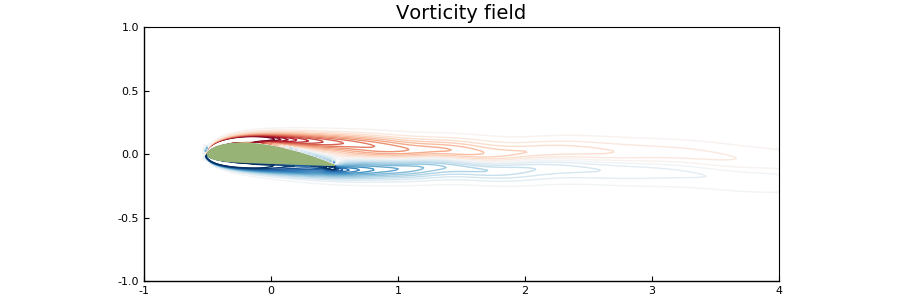

In [6]:
# plot it
plot(xg,yg,ω,levels=range(-15,15,length=30), color = :RdBu,clim=(-15,15),ylim=(-1,1),xlim=(-1,4),size=(900,300),title="Vorticity field")
plot!(body)

### Plot the streamfunction field
In this case, we also will create a line contour plot, but use the same color for each contour. Why do we do this? Maybe you have a guess once you look at it.

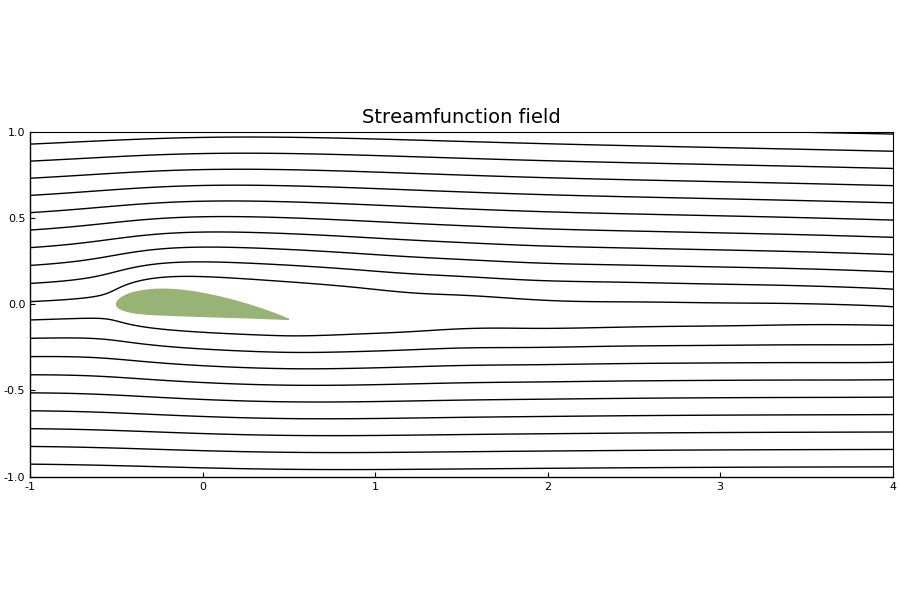

In [7]:
plot(xg,yg,ψ,levels=range(-1,2,length=31), color = :black, ylim = (-1,1),xlim = (-1,4),size=(900,600),title="Streamfunction field")
plot!(body)

### Plot the velocity field components
This is a vector field, so we will plot the components separately.

In [8]:
xue, yue, xve, yve = coordinates(u,sys.grid)

(-1.0150000000000001:0.01:4.015, -1.03:0.01:1.03, -1.01:0.01:4.01, -1.035:0.01:1.035)

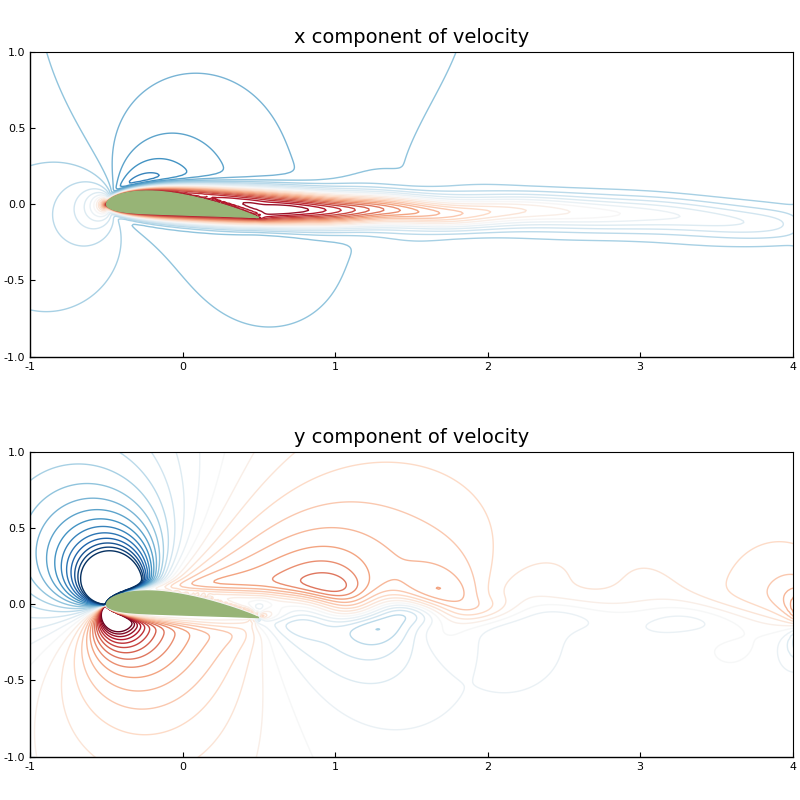

In [9]:
ps1 = plot(xue,yue,u.u,levels=range(-0.1,1.5,length=31), color = :RdBu,clim=(-0.1,1.5),
    ylim=(-1,1),xlim=(-1,4),title="x component of velocity")
plot!(ps1,body)
ps2 = plot(xve,yve,u.v,levels=range(-0.15,0.15,length=31), color = :RdBu,clim=(-0.15,0.15),
    ylim=(-1,1),xlim=(-1,4),title="y component of velocity")
plot!(ps2,body)
plot(ps1,ps2,layout=(2,1),size=(800,800))

### Plot the magnitude of the velocity field
This field is the speed of the flow.

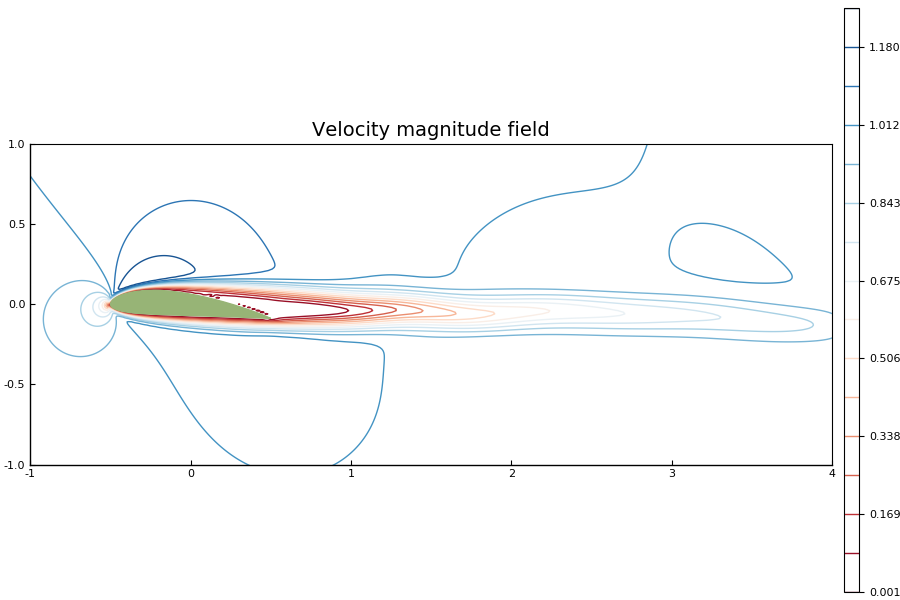

In [10]:
umag = mag(u)
xc, yc = coordinates(umag,sys.grid)
plot(xc,yc,umag,color = :RdBu, ylim = (-1,1),xlim = (-1,4),size=(900,600),title="Velocity magnitude field",colorbar=:true)
plot!(body)

Notice that the wake is clearly shown in this field, distinctly slower than the rest of the flow.

### Pressure coefficient field
Now let's plot the pressure coefficient field. The pressure coefficient $C_p$ is just a normalization of the pressure:

$$ C_p = \dfrac{p-p_\infty}{\frac{1}{2} \rho U_\infty^2} $$

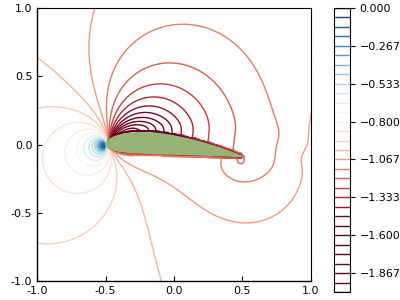

In [11]:
plot(xc,yc,Cp,levels=range(-2,0,length=31),color=:RdBu,clim=(-1.5,0),xlim=(-1,1),ylim=(-1,1),colorbar=:true)
plot!(body)

There are two notable features in the pressure. Along the upper part of the wing, the pressure is very low. This is the **suction** side of the wing, where it generates most of its lift. Also, there is a region of higher pressure at the front of the wing where the flow stagnates.